#### API key

In [9]:
from nixtlats import NixtlaClient
from dotenv import load_dotenv
import os

nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = os.getenv("NIXTLATS_API_KEY")
)

# checking if the API key is valid
nixtla_client.validate_api_key()

INFO:nixtlats.nixtla_client:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

#### Loading data

In [10]:
import pandas as pd
import os

# read train data
path = os.path.join('..','data','climate', 'splits', 'train', 'train.csv')
path_val = os.path.join('..','data','climate', 'splits', 'val', 'val.csv')
path_test = os.path.join('..','data','climate', 'splits', 'test', 'test.csv')

# concatenate train and val data
df_train = pd.read_csv(path)
df_test = pd.read_csv(path_test)
df_val = pd.read_csv(path_val)

df_train = pd.concat([df_train, df_val])

#### Plotting data

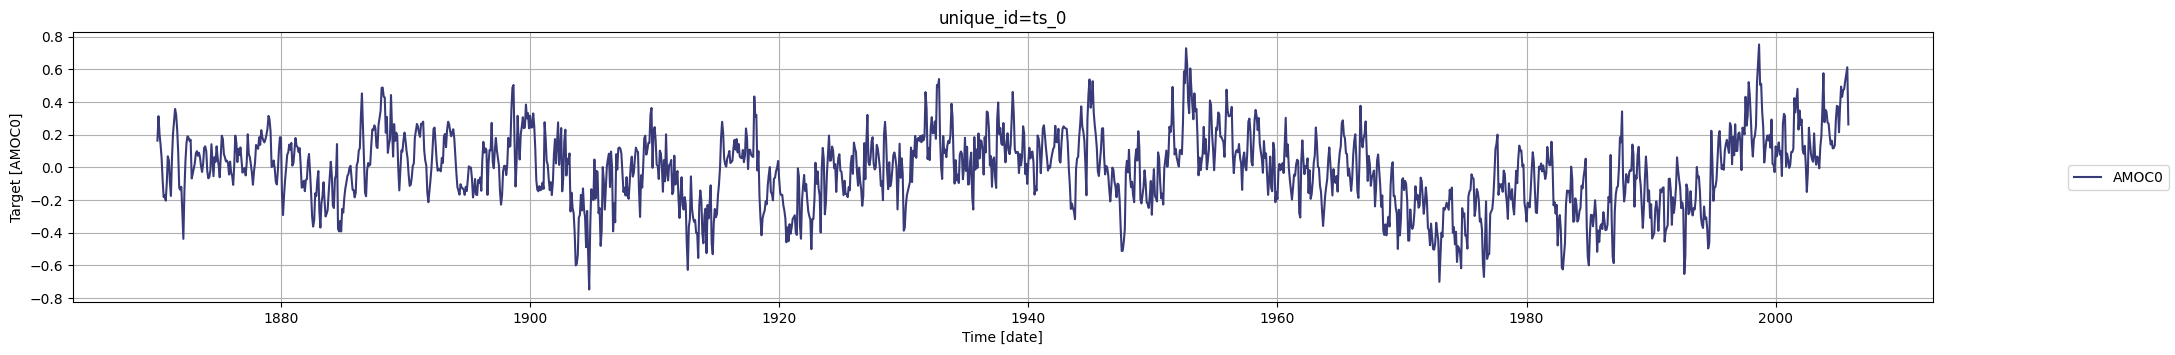

In [11]:
import matplotlib
import matplotlib.pyplot as plt

# plotting all data
nixtla_client.plot(df_train, time_col='date', target_col='AMOC0')

"In the context of monthly data, a period exceeding two years would typically be classified as long-horizon forecasting." URL: https://docs.nixtla.io/docs/forecasting_on_a_long_horizon

* **df**: A pandas dataframe containing the time series data.
* **h**: The number of steps ahead to forecast (in this case in months (MS = month start)).
* **freq**: The frequency of the time series in Pandas format. See pandas’ available frequencies (https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
* **time_col**: Column that identifies the datestamp column.
* **target_col**: The variable that we want to forecast.

forecasting the next 12 months using the SDK forecast method:

#### Functions

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame

def forecast_and_calculate_error(df_train, df_test, n_steps_to_forecast, time_collum, target_column, freq='MS', model = 'timegpt-1'):
    """
    n_steps_to_forecast: steps ahead to forecast
    freq: frequency of the time series data (MS=month start, D=day etc.)
    time_col: name of the column with the time data
    target_col: name of the column with the target data
    """
    # forecasting h steps ahead
    timegpt_fcst_df = nixtla_client.forecast(df=df_train, h=n_steps_to_forecast, freq=freq, time_col=time_collum, target_col=target_column, model = model)

    df_test_new = df_test[[time_collum, target_column]] # selecting only the time and target column
    df_test_new_h = df_test_new[0:n_steps_to_forecast] # making the test data the same size as the forecast

    # calculating the error between TimeGPT column in the forecast and the target column
    timegpt_fcst_df_with_test = timegpt_fcst_df.join(df_test_new_h, lsuffix='_left', rsuffix='_right')
    timegpt_fcst_df_with_test['error'] = timegpt_fcst_df_with_test[target_column] - timegpt_fcst_df_with_test['TimeGPT']
    print("")
    print("Forecast with test data (head 5)")
    print(timegpt_fcst_df_with_test.head(5))

    return timegpt_fcst_df_with_test

# plotting function
def plot_forecast(df: DataFrame, date_time: str, y_true: str, y_pred: str, xlabel: str ='date', ylabel: str ='y', title: str ='Title of plot'):
    sns.lineplot(data=df, x=date_time, y=y_true, label=f'{y_true} (ground truth)')
    sns.lineplot(data=df, x=date_time, y=y_pred, label=f'{y_pred} (prediction)')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Forecasting accuracy 12 steps ahead

In [60]:
forecast_12_ahead = forecast_and_calculate_error(df_train, df_test, 12, 'date', 'AMOC0')

INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...



Forecast with test data (head 5)
    date_left   TimeGPT  date_right     AMOC0     error
0  2005-12-01  0.269994  2005-12-01  0.222866 -0.047128
1  2006-01-01  0.280878  2006-01-01  0.434150  0.153272
2  2006-02-01  0.279755  2006-01-31  0.334138  0.054382
3  2006-03-01  0.283919  2006-03-02  0.301449  0.017530
4  2006-04-01  0.288689  2006-04-02  0.348948  0.060259


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


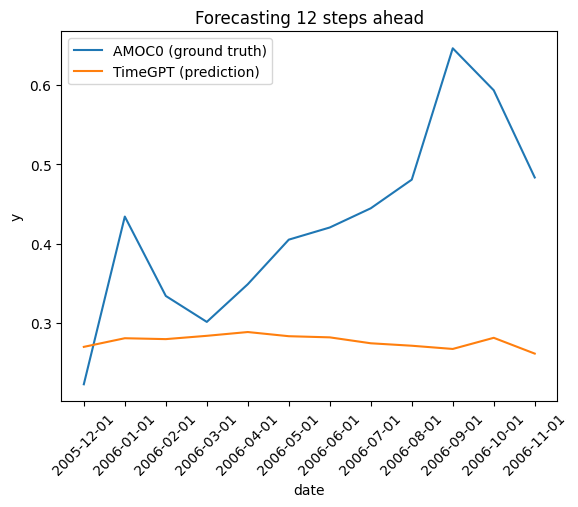

In [52]:
plot_forecast(forecast_12_ahead, date_time = 'date_left', y_true='AMOC0', y_pred='TimeGPT', title='Forecasting 12 steps ahead')

In [ ]:
# same plot as above, this time with the forecast (lyserød streg til sidst)
nixtla_client.plot(df_train, forecast_12_ahead, time_col='date', target_col='AMOC0')

# forecasting on 36 timesteps ahead
changed model to timegpt-1-long-horizon

In [6]:
# forecasting 36 steps ahead (changed model to timegpt-1-long-horizon)
forecast_36_ahead = forecast_and_calculate_error(df_train, df_test, 36, 'date', 'AMOC0', model='timegpt-1-long-horizon')

INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...



Forecast with test data (head 5)
    date_left   TimeGPT  date_right     AMOC0     error
0  2005-12-01  0.297201  2005-12-01  0.222866 -0.074335
1  2006-01-01  0.309189  2006-01-01  0.434150  0.124961
2  2006-02-01  0.312756  2006-01-31  0.334138  0.021381
3  2006-03-01  0.316088  2006-03-02  0.301449 -0.014639
4  2006-04-01  0.330452  2006-04-02  0.348948  0.018497


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


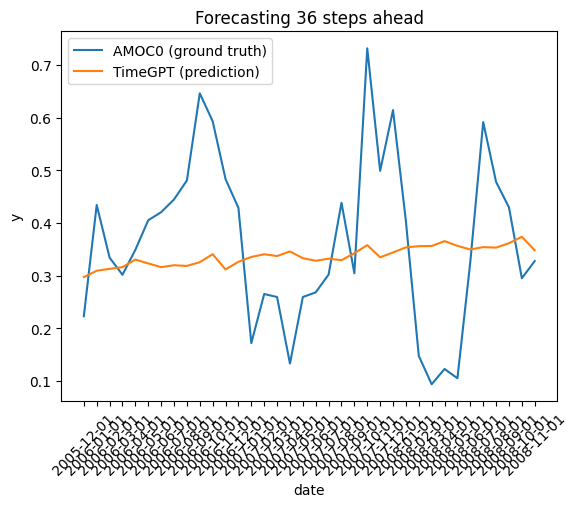

In [7]:
plot_forecast(forecast_36_ahead, date_time = 'date_left', y_true='AMOC0', y_pred='TimeGPT', title='Forecasting 36 steps ahead')

# 128 time steps ahead
also swifted to long horizon model

In [8]:
# forecasting 128 steps ahead
forecast_128_ahead = forecast_and_calculate_error(df_train, df_test, 128, 'date', 'AMOC0', model = 'timegpt-1-long-horizon')

INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...



Forecast with test data (head 5)
    date_left   TimeGPT  date_right     AMOC0     error
0  2005-12-01  0.297201  2005-12-01  0.222866 -0.074335
1  2006-01-01  0.309189  2006-01-01  0.434150  0.124961
2  2006-02-01  0.312756  2006-01-31  0.334138  0.021381
3  2006-03-01  0.316088  2006-03-02  0.301449 -0.014639
4  2006-04-01  0.330452  2006-04-02  0.348948  0.018497


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



Dataframe with forecast and test data
    date_left   TimeGPT  date_right     AMOC0     error
0  2005-12-01  0.297201  2005-12-01  0.222866 -0.074335
1  2006-01-01  0.309189  2006-01-01  0.434150  0.124961
2  2006-02-01  0.312756  2006-01-31  0.334138  0.021381
3  2006-03-01  0.316088  2006-03-02  0.301449 -0.014639
4  2006-04-01  0.330452  2006-04-02  0.348948  0.018497


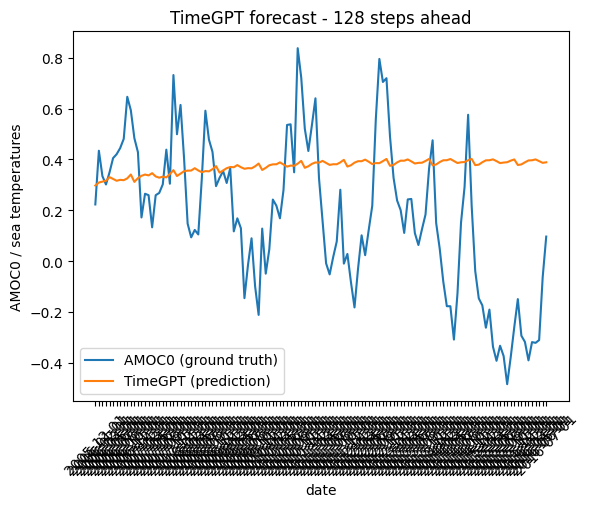

In [184]:
df_test_new_128 = df_test_new[0:128]

# calculating the error between TimeGPT column in the forecast and the target column
timegpt_fcst_df_with_test = timegpt_fcst_df.join(df_test_new_128, lsuffix='_left', rsuffix='_right')
timegpt_fcst_df_with_test['error'] = timegpt_fcst_df_with_test['AMOC0'] - timegpt_fcst_df_with_test['TimeGPT']

print("")
print("Dataframe with forecast and test data")
print(timegpt_fcst_df_with_test.head(5))

# make a plot of the forecast (TimeGPT) and the target column (AMOC0) with dates on the x-axis and the two columns on the y-axis
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=timegpt_fcst_df_with_test, x='date_left', y='AMOC0', label='AMOC0 (ground truth)')
sns.lineplot(data=timegpt_fcst_df_with_test, x='date_left', y='TimeGPT', label='TimeGPT (prediction)')
plt.xlabel('date')
plt.ylabel('AMOC0 / sea temperatures')
plt.title('TimeGPT forecast - 128 steps ahead')
plt.xticks(rotation=45)
plt.show()

More functionalities to look into:

1. Forecasting on long horizon: https://docs.nixtla.io/docs/forecasting_on_a_long_horizon
2. Prediction intervals, how uncertain is prediction "a prediction interval gives an estimated range within which a future observation will fall": https://docs.nixtla.io/docs/prediction_intervals
3. forecasting on irregular timestamps: https://docs.nixtla.io/docs/forecasting_time_series_with_irregular_timestamps
4. Cross validation: https://docs.nixtla.io/docs/cross_validation